<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="class")

X.shape, y.shape

((178, 13), (178,))

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X.describe().T[["mean", "std", "min", "max"]].head(10)

,mean,std,min,max
alcohol,13.000618,0.811827,11.03,14.83
malic_acid,2.336348,1.117146,0.74,5.80
ash,2.366517,0.274344,1.36,3.23
alcalinity_of_ash,19.494944,3.339564,10.60,30.00
magnesium,99.741573,14.282484,70.00,162.00
total_phenols,2.295112,0.625851,0.98,3.88
flavanoids,2.029270,0.998859,0.34,5.08
nonflavanoid_phenols,0.361854,0.124453,0.13,0.66
proanthocyanins,1.590899,0.572359,0.41,3.58
color_intensity,5.058090,2.318286,1.28,13.00


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [6]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

explained

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [7]:
cum_explained

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

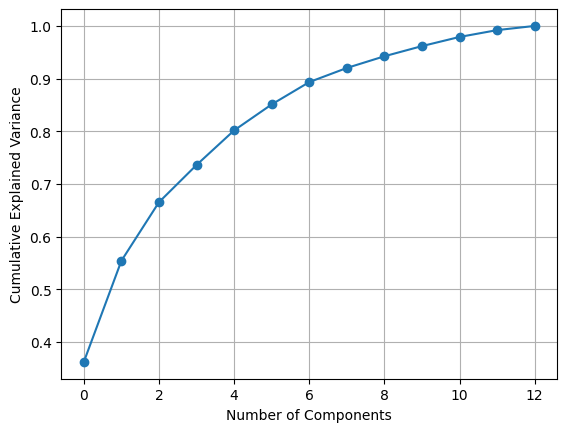

In [8]:
plt.figure()
plt.plot(cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [9]:
#Selection of k90 and k95
def components_for_threshold(cum_variance,threashold):
  return int(np.argmax(cum_variance>=threashold)+1)

k90 = components_for_threshold(cum_explained, 0.90)
print(k90)

8


In [10]:
k95 = components_for_threshold(cum_explained, 0.95)
print(k95)

10


In [11]:
k97 = components_for_threshold(cum_explained, 0.97)
print(k97)

11


In [12]:
k99 = components_for_threshold(cum_explained, 0.99)
print(k99)

12


In [14]:
k = k95
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(178, 10)

In [15]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(k)]
)

loadings.head(13)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139,-0.508619,0.211605
malic_acid,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.065827,0.075283,-0.309080
ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260,0.307694,-0.027125
alcalinity_of_ash,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970,-0.200449,0.052799
magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361,-0.271403,0.067870
total_phenols,0.394661,0.065040,0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.405934,-0.286035,-0.320131
flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026,-0.018920,-0.060685,-0.187245,-0.049578,-0.163151
nonflavanoid_phenols,-0.298533,0.028779,0.170368,-0.203301,-0.500703,-0.258594,0.595447,-0.233285,-0.195501,0.215535
proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860,-0.533795,0.372139,0.368227,0.209145,0.134184
color_intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.033797,-0.056218,-0.290775


In [16]:
def top_loadings_for_pc(loadings_df, pc_name, top_n=5):
  s = loadings_df[pc_name].abs().sort_values(ascending=False).head(top_n)
  return pd.DataFrame({"features": s.index, "abs_loadin": s.values})

top_pc1 = top_loadings_for_pc(loadings, "PC1", top_n=5)
top_pc1

,features,abs_loadin
0,flavanoids,0.422934
1,total_phenols,0.394661
2,od280/od315_of_diluted_wines,0.376167
3,proanthocyanins,0.313429
4,nonflavanoid_phenols,0.298533


In [17]:
top_pc2 = top_loadings_for_pc(loadings, "PC2", top_n=5)
top_pc2

,features,abs_loadin
0,color_intensity,0.529996
1,alcohol,0.483652
2,proline,0.364903
3,ash,0.316069
4,magnesium,0.299634


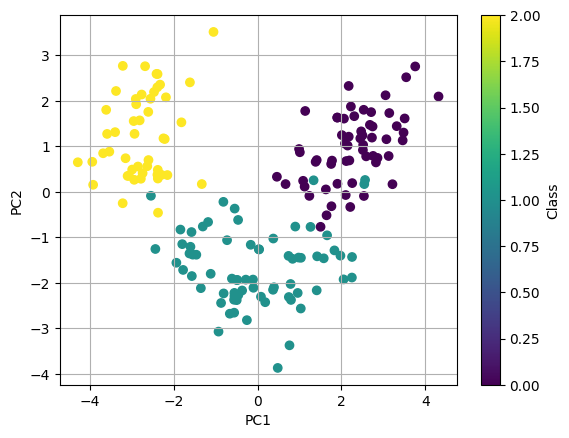

In [18]:
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.colorbar(scatter, label="Class")
plt.show()